#Exámen Segundo Periodo
##Probabilidad y Estadística de Datos
    Andrea Espindola Macias (ID: 0243394)
    Desmond Anthony Ryan (ID: 0247230)

####24/10/2022



##Instrucciones (Preguntas):
1. Interpreta detalladamente el summary estadístico-descriptivo de los atributos númericos.
2. Presenta un dataframe con los 10 sneakers con mayores ventas de California.
3. ¿Cuál fue la media de las ventas en NYC?
4. Muestra un dataframe de shoedata que contenga solo tres columnas y diez renglones.
5. ¿Cuáles fueron los sneakers con mayores ventas y menor porcentaje de beneficios?

#Introducción:

#1.

In [39]:
import pandas as pd
import seaborn as sns
import numpy as np


In [21]:
df = pd.read_csv("shoes_dataset.csv")

In [22]:
df

,Order Date,Brand,Sneaker,Sale,Retail,Profit,ProfitPercent,Buyer Region
0,1/15/18,Off White,Air Jordan 1 Retro High Off White Chicago,"1,525",190,1335,702.631579,New York
1,1/15/18,Off White,Air Jordan 1 Retro High Off White Chicago,"1,661",190,1471,774.210526,Texas
2,1/15/18,Off White,Air Force 1 Low Off White,615,170,445,261.764706,California
3,1/15/18,Off White,Air Force 1 Low Off White,625,170,455,267.647059,Texas
4,1/15/18,Off White,Air Max 97 Off White,750,190,560,294.736842,Michigan
...,...,...,...,...,...,...,...,...
107,1/21/18,Off White,Air VaporMax Off White,790,250,540,216.000000,New Jersey
108,1/21/18,Off White,Air VaporMax Off White,870,250,620,248.000000,Colorado
109,1/21/18,Off White,Blazer Mid Off White,615,130,485,373.076923,California
110,1/21/18,Off White,React Hyperdunk 2017 Flyknit Off White,415,200,215,107.500000,Texas


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order Date     112 non-null    object 
 1   Brand          112 non-null    object 
 2   Sneaker        112 non-null    object 
 3   Sale           112 non-null    object 
 4   Retail         112 non-null    int64  
 5   Profit         112 non-null    int64  
 6   ProfitPercent  112 non-null    float64
 7   Buyer Region   112 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 7.1+ KB


Aqui te dan basicamente la información (el tipo de datos) sobre los datos que contiene nuestro dataframe. 

En esta base de datos encontramos toda la información acerca de los pedidos de zapatos Off-WHite. En primer lugar, tenemos la fecha de la orden (Order Date) y la marca (Brand) que claramente es igual en todos los pedidos. 

En seguida enocontramos el apartado "sneakers" que es el modelo de calzado. Igualmente, tenemos otro apartado "sale" que indica la cantidad por la cual el zapato se vendió y otro de "retail" que es el precio del zapato de fabrica o lo que pagó la tienda por el. 

También tenemos que tener un apartado llamado "profit" el cual indica la ganancia que se generó en la venta de cada zapato, al igual que el porcentaje de esta ganancia (profit percentage). 

Por último tenemos el apartado de "region" (Buyer Region) en el cual se indica el lugar en el que se hizo el pedido del calzado.


In [24]:
df.shape

(112, 8)

con SHAPE vemos la estructura de nuestro dataframe, cuantas filas y cuantas columnas tiene. 

In [38]:
df.describe()

,Sale,Retail,Profit,ProfitPercent
count,112.000000,112.000000,112.000000,112.000000
mean,818.848214,181.428571,637.419643,363.244919
std,362.718097,31.303718,363.969770,207.973384
min,360.000000,130.000000,160.000000,80.000000
25%,610.000000,160.000000,419.750000,220.294737
50%,695.000000,190.000000,530.000000,294.243421
75%,970.750000,190.000000,810.750000,506.718750
max,1725.000000,250.000000,1535.000000,807.894737


Aqui arriba vemos algunos datos estadísticos como por ejemplo el promedio, el mínimo o el máximo de las columnas del data frame. En este caso podemos ver el numero de registros en el apartado de (count), en seguida podemos ver en la linea "mean" el promedio de las ventas, del retail, del profit o del porcentaje del profit. Igualmente, podemos observar la línea de los minimos en estas 4 categorías "sale, retail, profit, profit percetnage", al igual que el máximo. 

#2.

In [25]:
df['Sale']= df['Sale'].apply(str).str.replace(',','').astype(float)

In [26]:
df["Buyer Region"] = df["Buyer Region"].apply(str).str.replace(' ','').astype(str)

In [27]:
california = pd.DataFrame()
california = df
california["Buyer Region"] = california["Buyer Region"].astype("string")
california = california.groupby(['Sneaker']).sum().sort_values("Sale", ascending = False).head(10)

In [28]:
california

,Sale,Retail,Profit,ProfitPercent
Sneaker,,,,
Air Jordan 1 Retro High Off White Chicago,23323.0,2850,20473,10775.263158
Air Presto Off White,18029.0,2560,15469,9668.125000
Air Max 97 Off White,10245.0,3040,7205,3792.105263
Air VaporMax Off White,9533.0,3000,6533,2613.200000
Blazer Mid Off White,8119.0,1560,6559,5045.384616
Air Force 1 Low Off White,6909.0,1700,5209,3064.117647
React Hyperdunk 2017 Flyknit Off White,5844.0,2800,3044,1522.000000
Air Max 90 Off White,5224.0,1280,3944,2465.000000
Zoom Fly Off White,4485.0,1530,2955,1738.235294


#3.

In [29]:
df.dropna
df['Sale']= df['Sale'].apply(str).str.replace(',','').astype(float)

In [30]:
df['Buyer Region']= df["Buyer Region"].astype("string")

In [31]:
salesNYC = df.groupby(by='Buyer Region').mean().Sale.loc["NewYork"]
salesNYC

958.1

El promedio de ventas en NYC fue de 958.1.

#4.

In [32]:
df.head(10)

,Order Date,Brand,Sneaker,Sale,Retail,Profit,ProfitPercent,Buyer Region
0,1/15/18,Off White,Air Jordan 1 Retro High Off White Chicago,1525.0,190,1335,702.631579,NewYork
1,1/15/18,Off White,Air Jordan 1 Retro High Off White Chicago,1661.0,190,1471,774.210526,Texas
2,1/15/18,Off White,Air Force 1 Low Off White,615.0,170,445,261.764706,California
3,1/15/18,Off White,Air Force 1 Low Off White,625.0,170,455,267.647059,Texas
4,1/15/18,Off White,Air Max 97 Off White,750.0,190,560,294.736842,Michigan
5,1/15/18,Off White,Air Max 97 Off White,620.0,190,430,226.315789,Massachusetts
6,1/15/18,Off White,Air Presto Off White,1150.0,160,990,618.750000,California
7,1/15/18,Off White,Air VaporMax Off White,805.0,250,555,222.000000,Pennsylvania
8,1/15/18,Off White,Blazer Mid Off White,660.0,130,530,407.692308,Illinois
9,1/15/18,Off White,Blazer Mid Off White,690.0,130,560,430.769231,Colorado


In [33]:
df.iloc[:10,:3]


,Order Date,Brand,Sneaker
0,1/15/18,Off White,Air Jordan 1 Retro High Off White Chicago
1,1/15/18,Off White,Air Jordan 1 Retro High Off White Chicago
2,1/15/18,Off White,Air Force 1 Low Off White
3,1/15/18,Off White,Air Force 1 Low Off White
4,1/15/18,Off White,Air Max 97 Off White
5,1/15/18,Off White,Air Max 97 Off White
6,1/15/18,Off White,Air Presto Off White
7,1/15/18,Off White,Air VaporMax Off White
8,1/15/18,Off White,Blazer Mid Off White
9,1/15/18,Off White,Blazer Mid Off White


#5.

In [34]:
dfmasventas = df.groupby(by='Sneaker').count().sort_values(by='Sale',ascending=False).head(10)
dfmasventas

,Order Date,Brand,Sale,Retail,Profit,ProfitPercent,Buyer Region
Sneaker,,,,,,,
Air Max 97 Off White,16,16,16,16,16,16,16
Air Presto Off White,16,16,16,16,16,16,16
Air Jordan 1 Retro High Off White Chicago,15,15,15,15,15,15,15
React Hyperdunk 2017 Flyknit Off White,14,14,14,14,14,14,14
Air VaporMax Off White,12,12,12,12,12,12,12
Blazer Mid Off White,12,12,12,12,12,12,12
Air Force 1 Low Off White,10,10,10,10,10,10,10
Zoom Fly Off White,9,9,9,9,9,9,9
Air Max 90 Off White,8,8,8,8,8,8,8


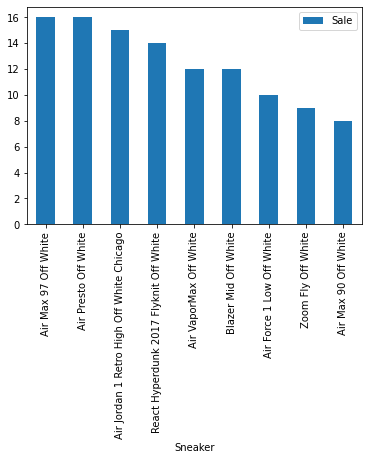

In [45]:
dfmasventas['Sneaker'] = dfmasventas.index
dfmasventas.plot(x='Sneaker', y='Sale', kind ='bar')

In [35]:
dfmenosprofitp = df.groupby(by='Sneaker').count().sort_values(by='ProfitPercent', ascending=True).head(10)
dfmenosprofitp

,Order Date,Brand,Sale,Retail,Profit,ProfitPercent,Buyer Region
Sneaker,,,,,,,
Air Max 90 Off White,8,8,8,8,8,8,8
Zoom Fly Off White,9,9,9,9,9,9,9
Air Force 1 Low Off White,10,10,10,10,10,10,10
Air VaporMax Off White,12,12,12,12,12,12,12
Blazer Mid Off White,12,12,12,12,12,12,12
React Hyperdunk 2017 Flyknit Off White,14,14,14,14,14,14,14
Air Jordan 1 Retro High Off White Chicago,15,15,15,15,15,15,15
Air Max 97 Off White,16,16,16,16,16,16,16
Air Presto Off White,16,16,16,16,16,16,16


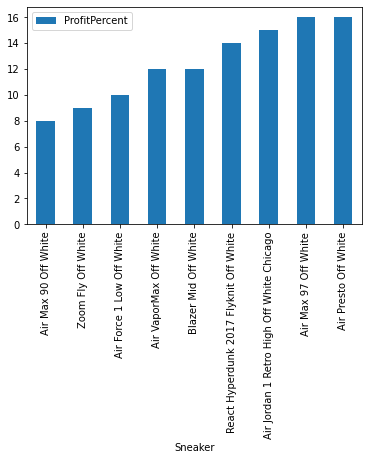

In [47]:
dfmenosprofitp['Sneaker'] = dfmenosprofitp.index
dfmenosprofitp.plot(x='Sneaker', y='ProfitPercent', kind ='bar')

#Conclusiones:

Este análisis nos ayudo visualizar y procesar de mejor manera los datos.  Entendimos el proceso que conlleva organizar y sacar la información necesaria para el análisis y la toma de decisiones. Al tener los datos presentes de una manera visual, nos permitió poder entenderlos y así procesarlos. Personalmente este ejercicio fue de gran ayuda porque nos ayudó a ver como podemos analizar una empresa como tal y a darle un uso mucho más útil a los datos que las bases de datos nos brindan. 